In [1]:
# Load in the dataframe as df:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1. Do smokers have higher insurance charges than non-smokers?

Null hypothesis: Smokers do not have higher insurance charges than non-smokers.

Alternative Hypothesis: Smokers do have higher insurance charges than non-smokers.

**Selected Test: Two-Sample T-Test**

**We will reject the null hypothesis as p-value < 0.05. Our distribution does not appear to be normal, however according to our parametric test, n > 15 so we can safely ignore the normality assumption.**

In [8]:
# see how many do and do not smoke
df['smoker'].value_counts()
# Filtering out those who smoke or don't smoke
smoker_df = df.loc[df['smoker']== "yes"].copy()
non_smoker_df = df.loc[df['smoker']== "no"].copy()


In [9]:
smoker_charge = smoker_df['charges']
non_smoker_charge = non_smoker_df['charges']

### Check and Remove Outliers

In [10]:
# Check for outliers in smoker group
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [11]:
# check for outliers in non smoker group
zscores= stats.zscore(non_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [12]:
# remove outlier for non smoker group
non_smoker_charge = non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]

In [14]:
# test the strength group for normality
result_smoker_charge = stats.normaltest(smoker_charge)
result_smoker_charge

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [15]:
result_non_smoker_charge = stats.normaltest(non_smoker_charge)
result_non_smoker_charge

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Our p-value < 0.05 which means our data is not normally distributed for both samples. However, according to parametric test n > 15 so we can ignore the normality assumption.

###  Test for equal variance


In [16]:
result = stats.levene(smoker_charge, non_smoker_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Looks like we don't have equal variances, but that won't stop us! We just need to be sure to include "equal_var = False" when we perform our t-test.

In [17]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the insurance charges for smokers and non-smokers.

Q2. Are men more likely to smoke than women?

Null Hypothesis: Men are no more likely than women to smoke.

Alternative hypothesis: Men are more likely to smoke than women.

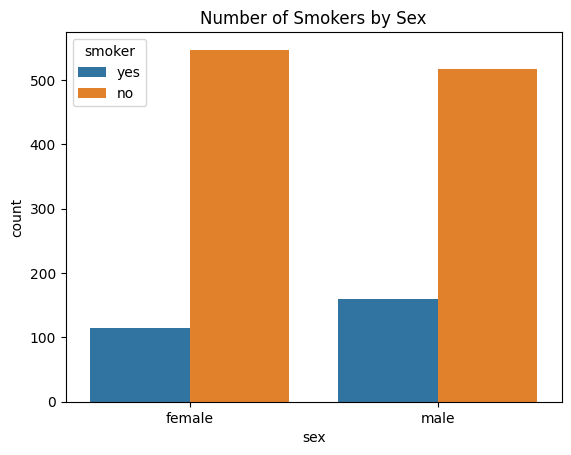

In [19]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [21]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [22]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject the null hypothesis that there is no relationship between gender and smoker status.

This means that we accept the alternate hypothesis and conclude that men are more likely to smoke than women.

Q3. Do different regions have different charges, on average?

Null Hypothesis: Different regions do not have different charges, on average.

Alternative Hypothesis: Different regions do have different charges on average. 


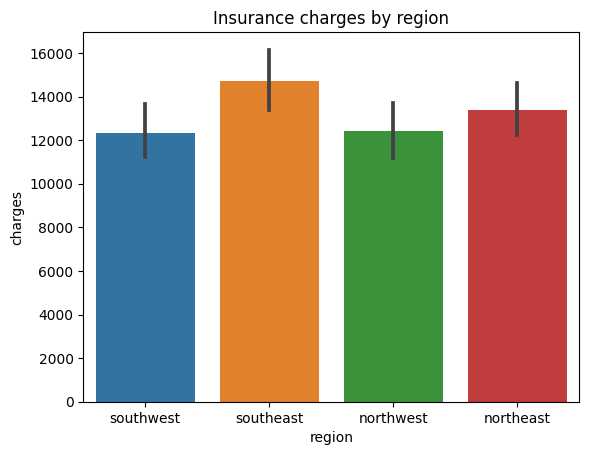

In [51]:
ax = sns.barplot(data=df, x='region',y='charges');
ax.set_title("Insurance charges by region");

### Check for and remove outliers

In [27]:
# Check for outliers in weight for strength group
zscores= stats.zscore(southeast_charges)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [28]:
# remove outliers from strength group
southeast_charges = southeast_charges[(np.abs(stats.zscore(southeast_charges)) < 3)]

In [29]:
# Check for outliers in weight for strength group
zscores= stats.zscore(southwest_charges)
outliers = abs(zscores)>3
np.sum(outliers)

8

In [30]:
# remove outliers from strength group
southwest_charges = southwest_charges[(np.abs(stats.zscore(southwest_charges)) < 3)]

In [31]:
# Check for outliers in weight for strength group
zscores= stats.zscore(northwest_charges)
outliers = abs(zscores)>3
np.sum(outliers)

7

In [32]:
# remove outliers from strength group
northwest_charges = northwest_charges[(np.abs(stats.zscore(northwest_charges)) < 3)]

In [33]:
# Check for outliers in weight for strength group
zscores= stats.zscore(northeast_charges)
outliers = abs(zscores)>3
np.sum(outliers)

4

In [34]:
# remove outliers from strength group
northeast_charges = northeast_charges[(np.abs(stats.zscore(northeast_charges)) < 3)]

In [44]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [45]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [46]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


### Testing assumption for equal variance

In [47]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Looks like we don't have equal variances, but that won't stop us! 

In [48]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference of insurance charges between regions.